**<font size='7'>NOTEBOOK RESULTS</font>** 

Authors: **Massimo Romano** (2043836), **Paolo Renzi** (1887793)

In this notebook we show the results of our experiments. 

<font size='4'>Training hyperparameters</font>

- *num_epochs*: **100**
- *batch_size*: **64**
- *learning_rate*: **0.01**
- *optimizer*: **adam**
- *patience*: **5**
- *lr_scheduler*: **0.25**
- *label_smoothing*: **0.1**

<font size='4'> Model hyperparameters</font>

- *dropout_rate*: **0.1**
- *n_filter*: **39**
- *num_features*: **39**
- *generator_type*: **conv**
- *kernel_size*: **2**
- *omega_0*: **25**
- *hidden_scale*: **1**
- *af_type*: **sin**

In particular we have done the following trials:

- *TAB Trials*: we have tested CkTIM and TIM networks without augmentation with different numbers of TAB

- *Augmentation Trials*: we have tested CkTIM network with TAB=6 (the better case of previous trials) without and with augmentation, to see how augmentation increase performances

**IMPORT**

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import dataloader.utils as utils

**DATA LOADING**

In this section we load the json files that contain training/validation loss and accuracy

In [2]:
# load the dictionary {'model': [model_name], 'epoch': [1, 2 ...], 'loss': [1.9, 1.8 ...], 'accuracy': [0.6, 0.7, ...], 'recall': [0.2, 0.3, ...], 'precision': [0.3, 0.4, ...], 'f1-score': [0.5, 0.6, ...]}
data_training_cktim_tab1 = utils.load_metrics('./results/CkTIM_TAB1/training_metrics.json')
data_validation_cktim_tab1= utils.load_metrics('./results/CkTIM_TAB1/validation_metrics.json')

data_training_cktim_tab3 = utils.load_metrics('./results/CkTIM_TAB3/training_metrics.json')
data_validation_cktim_tab3 = utils.load_metrics('./results/CkTIM_TAB3/validation_metrics.json')

data_training_cktim_tab6= utils.load_metrics('./results/CkTIM_TAB6/training_metrics.json')
data_validation_cktim_tab6 = utils.load_metrics('./results/CkTIM_TAB6/validation_metrics.json')

data_training_tim_tab1 = utils.load_metrics('./results/TIM_TAB1/training_metrics.json')
data_validation_tim_tab1 = utils.load_metrics('./results/TIM_TAB1/validation_metrics.json')

data_training_tim_tab3 = utils.load_metrics('./results/TIM_TAB3/training_metrics.json')
data_validation_tim_tab3 = utils.load_metrics('./results/TIM_TAB3/validation_metrics.json')

data_training_tim_tab6 = utils.load_metrics('./results/TIM_TAB6/training_metrics.json')
data_validation_tim_tab6 = utils.load_metrics('./results/TIM_TAB6/validation_metrics.json')

data_training_augmented_cktim6 = utils.load_metrics('./results/CkTIM_TAB6_aug/training_metrics.json')
data_validation_augmented_cktim6 = utils.load_metrics('./results/CkTIM_TAB6_aug/validation_metrics.json')

# Load the epochs, loss and accuracy in training and validation for the plots
epochs = data_training_cktim_tab1['epoch'] 

training_loss_cktim_tab1 = data_training_cktim_tab1['loss']
training_acc_cktim_tab1 = data_training_cktim_tab1['accuracy']
validation_loss_cktim_tab1 = data_validation_cktim_tab1['loss']
validation_acc_cktim_tab1 = data_validation_cktim_tab1['accuracy']

training_loss_cktim_tab3 = data_training_cktim_tab3['loss']
training_acc_cktim_tab3 = data_training_cktim_tab3['accuracy']
validation_loss_cktim_tab3 = data_validation_cktim_tab3['loss']
validation_acc_cktim_tab3 = data_validation_cktim_tab3['accuracy']

training_loss_cktim_tab6 = data_training_cktim_tab6['loss']
training_acc_cktim_tab6 = data_training_cktim_tab6['accuracy']
validation_loss_cktim_tab6 = data_validation_cktim_tab6['loss']
validation_acc_cktim_tab6 = data_validation_cktim_tab6['accuracy']

training_loss_tim_tab1 = data_training_tim_tab1['loss']
training_acc_tim_tab1 = data_training_tim_tab1['accuracy']
validation_loss_tim_tab1 = data_validation_tim_tab1['loss']
validation_acc_tim_tab1 = data_validation_tim_tab1['accuracy']

training_loss_tim_tab3 = data_training_tim_tab3['loss']
training_acc_tim_tab3 = data_training_tim_tab3['accuracy']
validation_loss_tim_tab3 = data_validation_tim_tab3['loss']
validation_acc_tim_tab3 = data_validation_tim_tab3['accuracy']

training_loss_tim_tab6 = data_training_tim_tab6['loss']
training_acc_tim_tab6 = data_training_tim_tab6['accuracy']
validation_loss_tim_tab6 = data_validation_tim_tab6['loss']
validation_acc_tim_tab6 = data_validation_tim_tab6['accuracy']

training_loss_aug_cktim_tab6 = data_training_augmented_cktim6['loss']
training_acc_aug_cktim_tab6 = data_training_augmented_cktim6['accuracy']
validation_loss_aug_cktim_tab6 = data_validation_augmented_cktim6['loss']
valdation_acc_aug_cktim_tab6 = data_validation_augmented_cktim6['accuracy']

Metrics loaded ./results/CkTIM_TAB1/training_metrics.json
Metrics loaded ./results/CkTIM_TAB1/validation_metrics.json
Metrics loaded ./results/CkTIM_TAB3/training_metrics.json
Metrics loaded ./results/CkTIM_TAB3/validation_metrics.json
Metrics loaded ./results/CkTIM_TAB6/training_metrics.json
Metrics loaded ./results/CkTIM_TAB6/validation_metrics.json
Metrics loaded ./results/TIM_TAB1/training_metrics.json
Metrics loaded ./results/TIM_TAB1/validation_metrics.json
Metrics loaded ./results/TIM_TAB3/training_metrics.json
Metrics loaded ./results/TIM_TAB3/validation_metrics.json
Metrics loaded ./results/TIM_TAB6/training_metrics.json
Metrics loaded ./results/TIM_TAB6/validation_metrics.json
Metrics loaded ./results/CkTIM_TAB6_aug/training_metrics.json
Metrics loaded ./results/CkTIM_TAB6_aug/validation_metrics.json


<font size='6'>Loss/Accuracy CkTIM</font>

In this section there are 4 plots:

- *Upper Left*: Training Loss for CkTIM-net with TAB = 1, 3, 6 
- *Upper Right*: Training Loss Zoom (from epoch 50 to 100) for CkTIM-net with TAB = 1, 3, 6 
- *Bottom Left*: Training Accuracy for CkTIM-net with TAB = 1, 3, 6 
- *Bottom Right*: Training Accuracy Zoom (from epoch 50 to 100) for CkTIM-net with TAB = 1, 3, 6 

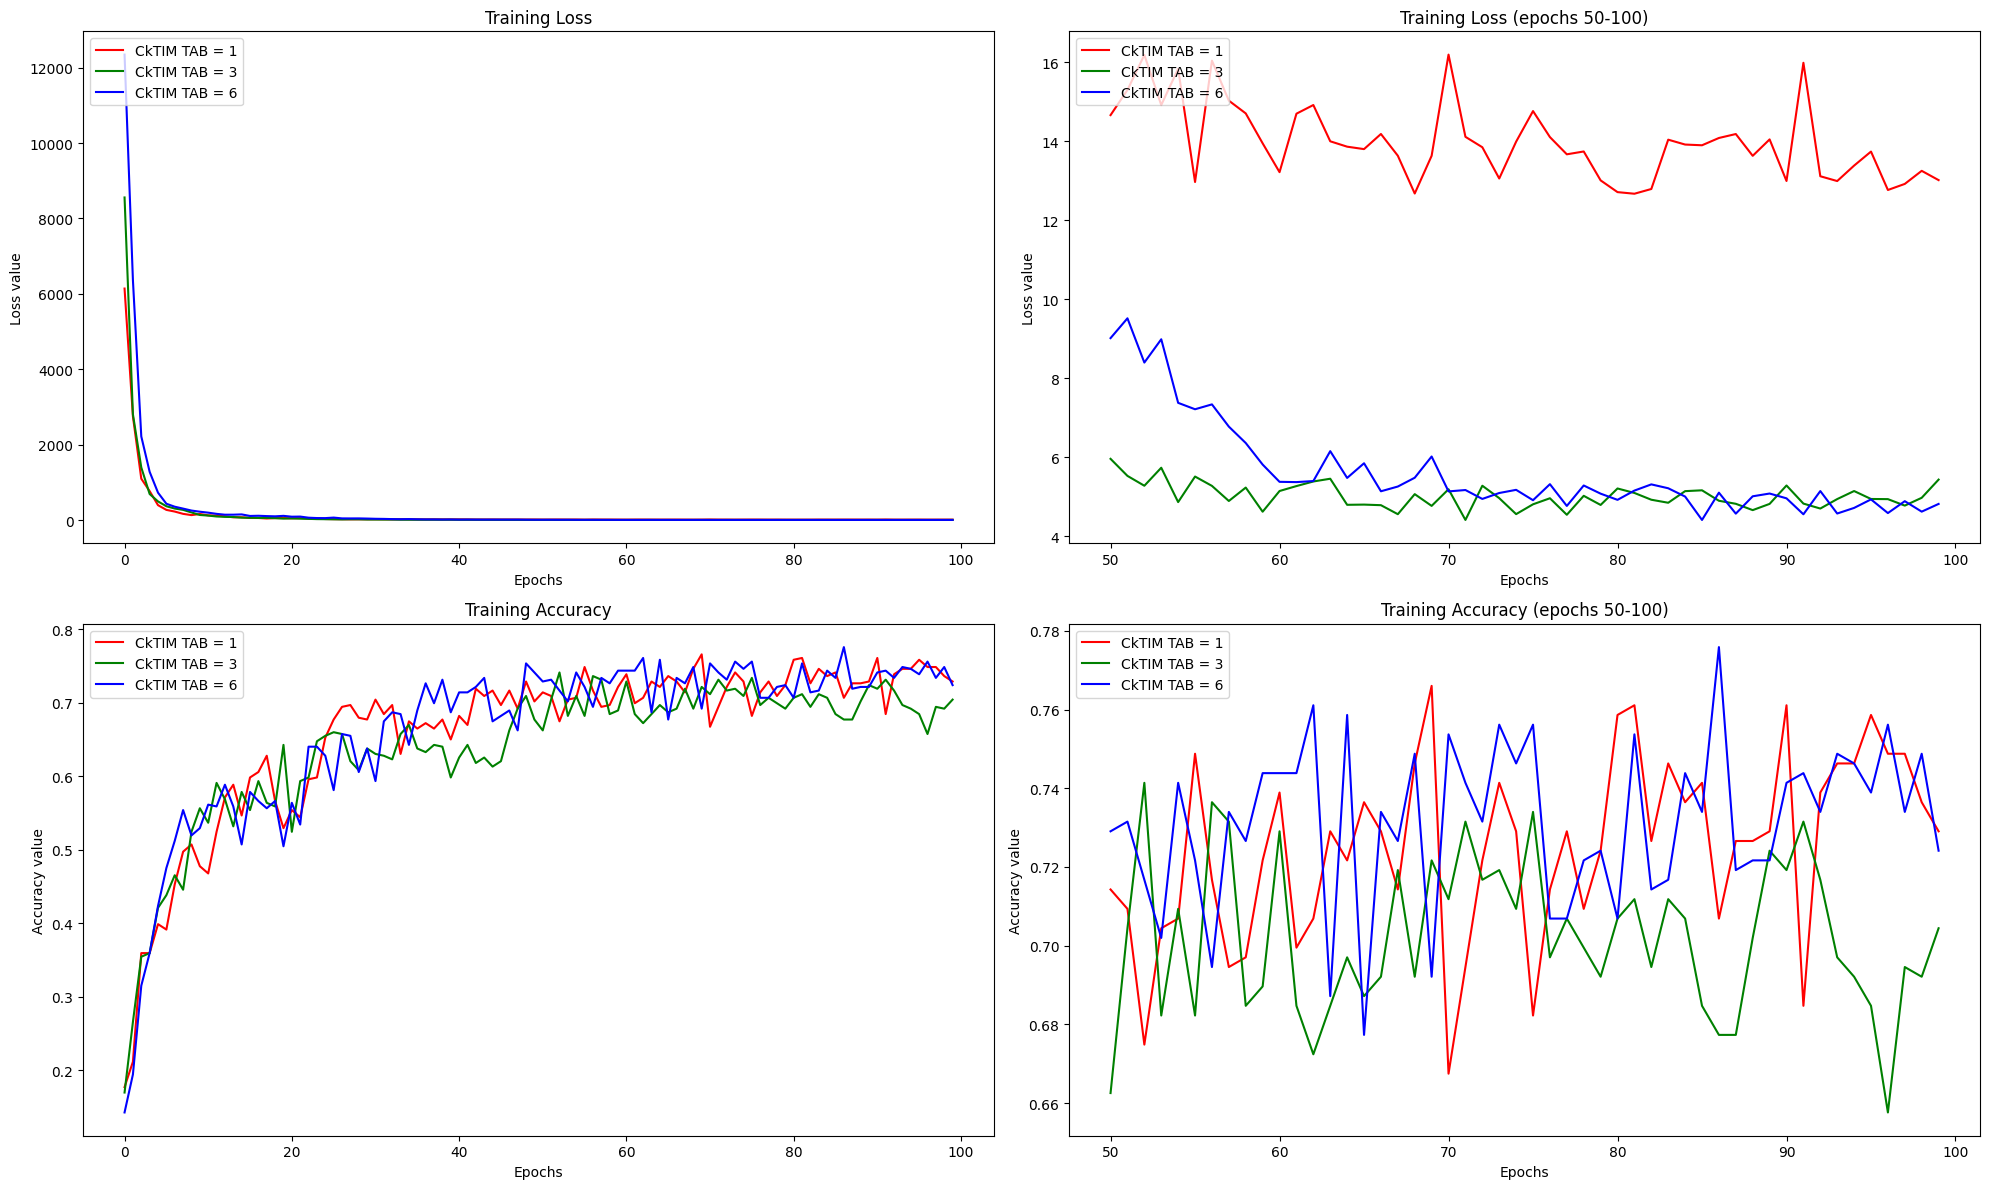

In [3]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,12))

# Set the functions, title, x_label, y_label and legend for the loss 
ax[0,0].plot(epochs, training_loss_cktim_tab1, label='CkTIM TAB = 1', color='r')
ax[0,0].plot(epochs, training_loss_cktim_tab3, label='CkTIM TAB = 3', color='g')
ax[0,0].plot(epochs, training_loss_cktim_tab6, label='CkTIM TAB = 6', color='b')
ax[0,0].set_title('Training Loss')
ax[0,0].set_xlabel('Epochs')
ax[0,0].set_ylabel('Loss value')
ax[0,0].legend(loc='upper left')

# Set the functions, title, x_label, y_label and legend for the loss 
ax[0,1].plot(epochs[50:], training_loss_cktim_tab1[50:], label='CkTIM TAB = 1', color='r')
ax[0,1].plot(epochs[50:], training_loss_cktim_tab3[50:], label='CkTIM TAB = 3', color='g')
ax[0,1].plot(epochs[50:], training_loss_cktim_tab6[50:], label='CkTIM TAB = 6', color='b')
ax[0,1].set_title('Training Loss (epochs 50-100)')
ax[0,1].set_xlabel('Epochs')
ax[0,1].set_ylabel('Loss value')
ax[0,1].legend(loc='upper left')

# Set the functions, title, x_label, y_label and legend for the loss 
ax[1,0].plot(epochs, training_acc_cktim_tab1, label='CkTIM TAB = 1', color='r')
ax[1,0].plot(epochs, training_acc_cktim_tab3, label='CkTIM TAB = 3', color='g')
ax[1,0].plot(epochs, training_acc_cktim_tab6, label='CkTIM TAB = 6', color='b')
ax[1,0].set_title('Training Accuracy')
ax[1,0].set_xlabel('Epochs')
ax[1,0].set_ylabel('Accuracy value')
ax[1,0].legend(loc='upper left')

# Set the functions, title, x_label, y_label and legend for the loss 
ax[1,1].plot(epochs[50:], training_acc_cktim_tab1[50:], label='CkTIM TAB = 1', color='r')
ax[1,1].plot(epochs[50:], training_acc_cktim_tab3[50:], label='CkTIM TAB = 3', color='g')
ax[1,1].plot(epochs[50:], training_acc_cktim_tab6[50:], label='CkTIM TAB = 6', color='b')
ax[1,1].set_title('Training Accuracy (epochs 50-100)')
ax[1,1].set_xlabel('Epochs')
ax[1,1].set_ylabel('Accuracy value')
ax[1,1].legend(loc='upper left')

# Display the plot
plt.tight_layout()  # This helps to prevent overlapping of subplots
plt.show()

- **Upper plots**: it's possible to see that on one hand incresing the number of TAB modules in CkTIM will means starting from very high values of loss (more than TIM-net as we can see in next section, because the number of trainable parameters of CkTIM is higher), but on the other hand the loss converge to smallest values.
 
- **Bottom plots**: it's possible to see that the training accuracy is not influenced a lot by the number of TABs blocks (differently from TIM-net in next section where the differences in accuracy among TABs are higher), and this means that the Continuous Convolutional Kernel also with only 1 Temporal Aware Block enlarge the receptive fields.

<font size='6'>Loss/Accuracy TIM</font>

In this section there are 4 plots:

- *Upper Left*: Training Loss for TIM-net with TAB = 1, 3, 6 
- *Upper Right*: Training Loss Zoom (from epoch 50 to 100) for TIM-net with TAB = 1, 3, 6 
- *Bottom Left*: Training Accuracy for TIM-net with TAB = 1, 3, 6 
- *Bottom Right*: Training Accuracy Zoom (from epoch 50 to 100) for TIM-net with TAB = 1, 3, 6 


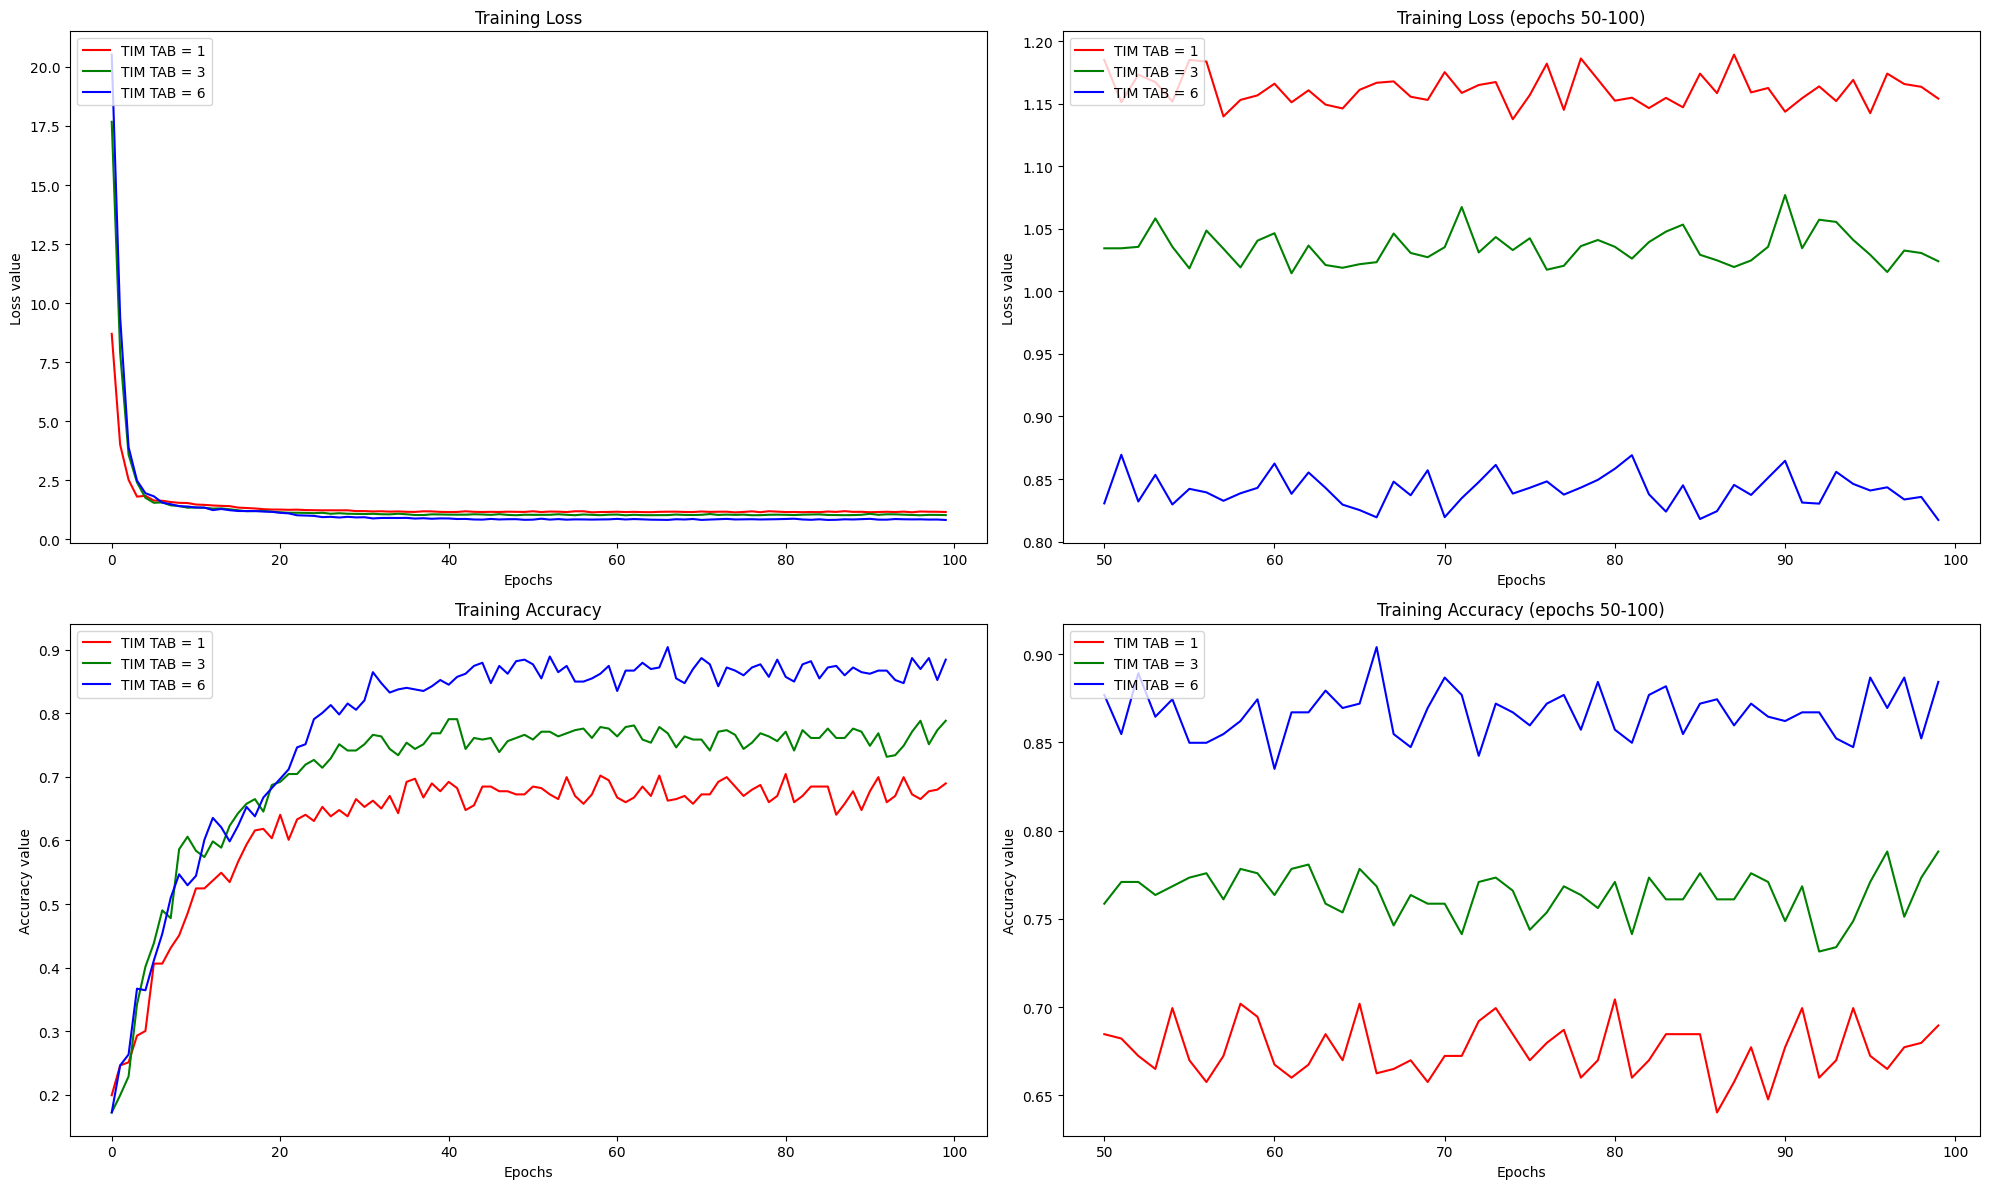

In [4]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,12))

# Set the functions, title, x_label, y_label and legend for the loss 
ax[0,0].plot(epochs, training_loss_tim_tab1, label='TIM TAB = 1', color='r')
ax[0,0].plot(epochs, training_loss_tim_tab3, label='TIM TAB = 3', color='g')
ax[0,0].plot(epochs, training_loss_tim_tab6, label='TIM TAB = 6', color='b')
ax[0,0].set_title('Training Loss')
ax[0,0].set_xlabel('Epochs')
ax[0,0].set_ylabel('Loss value')
ax[0,0].legend(loc='upper left')

# Set the functions, title, x_label, y_label and legend for the loss 
ax[0,1].plot(epochs[50:], training_loss_tim_tab1[50:], label='TIM TAB = 1', color='r')
ax[0,1].plot(epochs[50:], training_loss_tim_tab3[50:], label='TIM TAB = 3', color='g')
ax[0,1].plot(epochs[50:], training_loss_tim_tab6[50:], label='TIM TAB = 6', color='b')
ax[0,1].set_title('Training Loss (epochs 50-100)')
ax[0,1].set_xlabel('Epochs')
ax[0,1].set_ylabel('Loss value')
ax[0,1].legend(loc='upper left')

# Set the functions, title, x_label, y_label and legend for the loss 
ax[1,0].plot(epochs, training_acc_tim_tab1, label='TIM TAB = 1', color='r')
ax[1,0].plot(epochs, training_acc_tim_tab3, label='TIM TAB = 3', color='g')
ax[1,0].plot(epochs, training_acc_tim_tab6, label='TIM TAB = 6', color='b')
ax[1,0].set_title('Training Accuracy')
ax[1,0].set_xlabel('Epochs')
ax[1,0].set_ylabel('Accuracy value')
ax[1,0].legend(loc='upper left')

# Set the functions, title, x_label, y_label and legend for the loss 
ax[1,1].plot(epochs[50:], training_acc_tim_tab1[50:], label='TIM TAB = 1', color='r')
ax[1,1].plot(epochs[50:], training_acc_tim_tab3[50:], label='TIM TAB = 3', color='g')
ax[1,1].plot(epochs[50:], training_acc_tim_tab6[50:], label='TIM TAB = 6', color='b')
ax[1,1].set_title('Training Accuracy (epochs 50-100)')
ax[1,1].set_xlabel('Epochs')
ax[1,1].set_ylabel('Accuracy value')
ax[1,1].legend(loc='upper left')

# Display the plot
plt.tight_layout()  # This helps to prevent overlapping of subplots
plt.show()

- **Upper plots**: it's possible to see that increasing the TAB numbers in the TIM-net model will means obtaining less values of loss. In particular TIM-net with TAB = 6 (that have more trainable parameters) starts with highest values of loss, but converge to lowest values of loss with respect to TIM-net with TAB = 1, 3

- **Bottom plots**: it's possible to see the same reasoning for the accuracy, in particular increasing TAB numbers will means obtainin better performances in terms of training accuracy

<font size='6'>Augmentation effect</font>

In this plots it's possible to see how augmentation increase performances. 

In particular we have trained CkTIM with TAB=6 with the augmented dataset, to compare with CkTIM (TAB=6) trained with the original dataset. 

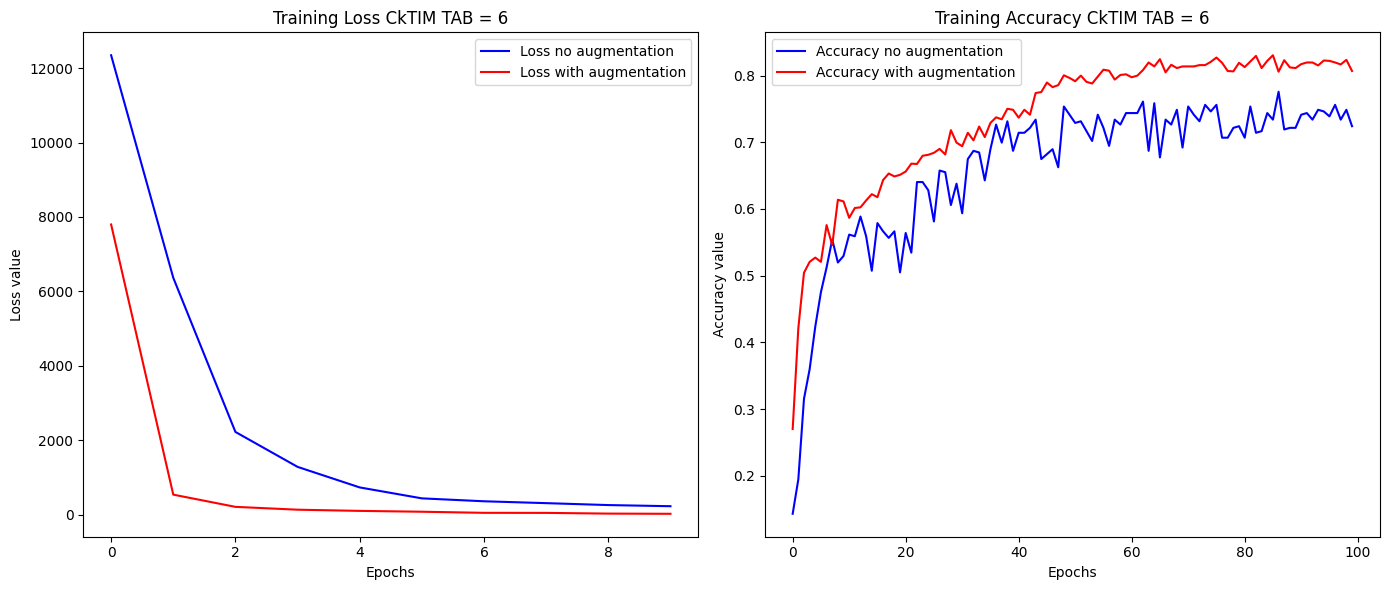

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,6))

# Set the functions, title, x_label, y_label and legend for the loss 
ax[0].plot(epochs[:10], training_loss_cktim_tab6[:10], label='Loss no augmentation', color='b')
ax[0].plot(epochs[:10], training_loss_aug_cktim_tab6[:10], label='Loss with augmentation', color='r')
ax[0].set_title('Training Loss CkTIM TAB = 6')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss value')
ax[0].legend()

# Set the functions, title, x_label, y_label and legend for the loss 
ax[1].plot(epochs, training_acc_cktim_tab6, label='Accuracy no augmentation', color='b')
ax[1].plot(epochs, training_acc_aug_cktim_tab6, label='Accuracy with augmentation', color='r')
ax[1].set_title('Training Accuracy CkTIM TAB = 6')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy value')
ax[1].legend()

# Display the plot
plt.tight_layout()  # This helps to prevent overlapping of subplots
plt.show()

- **Left plot**: it's possible to see how augmentation permits the loss to converge in less epochs to the minimum value. 

- **Right plot**: it's possible to see that augmentation increse the accuracy of the model, permits a better generalization

<font size='6'> Table of test performances</font>

In the first table we can see that increasing the number of TABs let to increase performances in terms of Accuracy, Precision, Recall and F1-Score in both architectures, but generally CkTIM perform better then TIM for each TAB. For example CkTIM with only TAB=1 perform better then TIM with TAB=3.

<img src="./images/perf-cktim-tim-table.png" alt="Description" width="400" height = "100" />

In this table it's possible to see that on the other hand CkTIM have more trainable parameters then TIM for each TAB level, i.e. more weight of the model and more inference time.

<img src="./images/time-and-param-table.png" alt="Description" width="500" height = "100" />

In this table it's possible to see how augmentation increase performances.

<img src="./images/aug-noaug-table.png" alt="Description" width="450" height = "100" />